# Загрузка данных

In [1]:
!pip install phik -q
!pip install shap -q
!pip install --upgrade scikit-learn -q

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import phik
import seaborn as sns
import shap
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from phik import phik_matrix
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
                        
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import make_pipeline as make_imblearn_pipeline
from imblearn.pipeline import Pipeline as imblearn_Pipeline
from imblearn.combine import SMOTETomek, SMOTEENN
                                  
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
pd.set_option('display.float_format', '{:,.2f}'.format)

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [3]:
kaggle_startups_sample = pd.read_csv('kaggle_startups_sample_submit_28062024.csv')
kaggle_startups_train = pd.read_csv('kaggle_startups_train_28062024.csv')
kaggle_startups_test = pd.read_csv('kaggle_startups_test_28062024.csv')

In [4]:
def display_dataset_info(data):

    print("Первые пять строк датасета:")
    display(data.head())
    print("\n")
    
    print("Размер датасета:")
    print(f"Количество строк: {data.shape[0]}, Количество столбцов: {data.shape[1]}")
    print("\n")
    

    print("Информация о датасете:")
    data.info()
    print("\n")
    
    print("Количество пропущенных значений по столбцам:")
    print(data.isnull().sum())
    print("\n")
    
    print("Дубликаты:") 
    print(data.duplicated().sum())
    print("\n")

In [5]:
display_dataset_info(kaggle_startups_sample)

Первые пять строк датасета:


,name,status
0,Crystalsol,closed
1,JBI Fish & Wings,operating
2,COINPLUS,closed
3,Imagine Communications,closed
4,DNA13,operating




Размер датасета:
Количество строк: 13125, Количество столбцов: 2


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    13125 non-null  object
 1   status  13125 non-null  object
dtypes: object(2)
memory usage: 205.2+ KB


Количество пропущенных значений по столбцам:
name      0
status    0
dtype: int64


Дубликаты:
0




In [6]:
display_dataset_info(kaggle_startups_train)

Первые пять строк датасета:


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,"828,626.00",operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,"42,935,019.00",operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,"35,456,381.00",operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,"22,250,000.00",operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN




Размер датасета:
Количество строк: 52516, Количество столбцов: 13


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


Количество пр

In [7]:
display_dataset_info(kaggle_startups_test)

Первые пять строк датасета:


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,"2,819,200.00",NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,"428,257.00",LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,"34,700,000.00",USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,"4,530,000.00",CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209




Размер датасета:
Количество строк: 13125, Количество столбцов: 11


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


Количество пропущенных значений по столбцам:
name                    0
category_list         591
funding_total

##### Промежуточные выводы:

Загрузили и первично осмотрели датасеты. 
* kaggle_startups_sample: Количество строк: 13125, Количество столбцов: 2, нет пропусков, нет  явных дубликатов, названия корректны
* kaggle_startups_train: Количество строк: 52516, Количество столбцов: 13, есть пропуски, явных дубликатов нет, названия корректны
* kaggle_startups_test:Количество строк: 13125, Количество столбцов: 11, есть пропуски, явных дубликатов нет, названия корректны
* типы данных не везде корректны, будем менять
* проведем еще одну проверку на дубликаты
* с пропусками разбеермся далее


# Предобработка данных

In [8]:
kaggle_startups_train['founded_at'] = kaggle_startups_train['founded_at'].astype("datetime64[ns]")
kaggle_startups_train['first_funding_at'] = kaggle_startups_train['first_funding_at'].astype("datetime64[ns]")
kaggle_startups_train['last_funding_at'] = kaggle_startups_train['last_funding_at'].astype("datetime64[ns]")
kaggle_startups_train['closed_at'] = kaggle_startups_train['closed_at'].astype("datetime64[ns]")

In [9]:
kaggle_startups_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [10]:
kaggle_startups_test['first_funding_at'] = kaggle_startups_test['first_funding_at'].astype("datetime64[ns]")
kaggle_startups_test['last_funding_at'] = kaggle_startups_test['last_funding_at'].astype("datetime64[ns]")

In [11]:
kaggle_startups_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      12534 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       11743 non-null  object        
 4   state_code         11430 non-null  object        
 5   region             11536 non-null  object        
 6   city               11538 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 1.1+ MB


В тренировочной и тестовой выборках обнаружены пропуски в столбцах с географическими данными и с категорией стартапа. Эти данные восстановить как-либо не получится, поэтому я поменяю их на unknown, чтобы не было пропусков. 

In [12]:
cols_with_nan = kaggle_startups_train[['country_code', 'state_code', 'region', 'city']].isna().any(axis=1)
kaggle_startups_train.loc[cols_with_nan, ['country_code', 'state_code', 'region', 'city']] = 'unknown'

In [13]:
kaggle_startups_train['category_list'] = kaggle_startups_train['category_list'].fillna('unknown')

In [14]:
cols_with_nan_test = kaggle_startups_test[['country_code', 'state_code', 'region', 'city']].isna().any(axis=1)
kaggle_startups_test.loc[cols_with_nan_test, ['country_code', 'state_code', 'region', 'city']] = 'unknown'

In [15]:
kaggle_startups_test['category_list'] = kaggle_startups_test['category_list'].fillna('unknown')

Также нужно обработать пропуски в столбце funding_total_usd, однако я обратила еще внимание на столбец с раундами финансирования, нам их дали не просто так, получается, чем больше раундов, тем больше сумма, поэтому я предлагаю заполнить в тренировочной выборке данные медианой, предварительно сгруппированной по раундам финансирования. Что касается тестовой выборки, в ней подобные изменения я бы делать не стала, исходя из предыдщуих ревью я поняла, что ее нужно оставлять максимально необработанной, так как  эта выборка имитирует реальный поток, в котором модели нужно будет работать со всеми наблюдениями. 

In [16]:
kaggle_startups_train['funding_total_usd'] = (kaggle_startups_train['funding_total_usd'].fillna(kaggle_startups_train.groupby('funding_rounds')['funding_total_usd'].transform('median')))

In [17]:
kaggle_startups_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      52516 non-null  object        
 2   funding_total_usd  52516 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       52516 non-null  object        
 5   state_code         52516 non-null  object        
 6   region             52516 non-null  object        
 7   city               52516 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

В столбце closed_at пока что оставим все как есть, пропуски там могут означать не только, что данных нет, но и что стартап не закрылся.

In [18]:
kaggle_startups_train['name'] = kaggle_startups_train['name'].fillna('unknown')

In [19]:
for col in kaggle_startups_train:
    print(kaggle_startups_train[col].unique ())
    print('Количество уникальных значений в поле:', kaggle_startups_train[col].nunique())

['Lunchgate' 'EarLens' 'Reviva Pharmaceuticals' ... 'Taskforce'
 'NetScaler' 'Apparcando']
Количество уникальных значений в поле: 52516
['Online Reservations|Restaurants' 'Manufacturing|Medical|Medical Devices'
 'Biotechnology' ... 'Gambling|Games|Online Gaming|Sports'
 'Aerospace|Mobile|Transportation|Travel'
 'Online Rental|Parking|Price Comparison']
Количество уникальных значений в поле: 22106
[  828626. 42935019. 35456381. ...  4582414.  3209000.   270820.]
Количество уникальных значений в поле: 15555
['operating' 'closed']
Количество уникальных значений в поле: 2
['CHE' 'USA' 'unknown' 'GBR' 'RUS' 'ESP' 'FRA' 'SWE' 'IND' 'KOR' 'TWN'
 'CHN' 'AUS' 'HUN' 'CAN' 'FIN' 'BRA' 'EGY' 'PRT' 'ISR' 'CHL' 'SVK' 'NLD'
 'ARG' 'ARE' 'JPN' 'IRL' 'DEU' 'LBN' 'EST' 'IDN' 'BEL' 'MEX' 'DNK' 'ITA'
 'GRC' 'ROM' 'TUR' 'SAU' 'MYS' 'NGA' 'QAT' 'BGR' 'GHA' 'UGA' 'JOR' 'AUT'
 'PAK' 'NZL' 'LVA' 'NOR' 'HRV' 'PER' 'LUX' 'SVN' 'POL' 'PHL' 'CZE' 'ISL'
 'PAN' 'BGD' 'GTM' 'THA' 'TTO' 'UKR' 'KEN' 'CRI' 'DZA' 'LTU' '

In [20]:
for col in kaggle_startups_test:
    print(kaggle_startups_test[col].unique ())
    print('Количество уникальных значений в поле:', kaggle_startups_test[col].nunique())

['Crystalsol' 'JBI Fish & Wings' 'COINPLUS' ... 'Inkd.com' 'AdWill'
 'RingCentral']
Количество уникальных значений в поле: 13125
['Clean Technology' 'Hospitality' 'Finance' ...
 'Design|E-Commerce|Marketplaces|Printing'
 'Advertising Exchanges|Mobile|Mobile Advertising'
 'Communications Hardware|Messaging|Mobile|Office Space|Technology|VoIP']
Количество уникальных значений в поле: 6207
[ 2819200.       nan   428257. ...  8199999.  1353678. 50250000.]
Количество уникальных значений в поле: 4549
['unknown' 'USA' 'LUX' 'CAN' 'MYS' 'DEU' 'GBR' 'FRA' 'ITA' 'CHN' 'ARG'
 'NLD' 'IRL' 'AUS' 'CHE' 'CHL' 'ESP' 'IND' 'ISR' 'KOR' 'RUS' 'PHL' 'BRA'
 'EGY' 'MEX' 'POL' 'AUT' 'EST' 'BEL' 'DNK' 'DMA' 'PRT' 'SWE' 'JOR' 'HUN'
 'JPN' 'COL' 'CZE' 'GRC' 'LTU' 'TWN' 'ISL' 'IDN' 'FIN' 'BGR' 'ARE' 'UKR'
 'KEN' 'NGA' 'TUR' 'CRI' 'THA' 'NOR' 'ROM' 'MMR' 'BHR' 'CYP' 'NZL' 'SVK'
 'CYM' 'LVA' 'MKD' 'PER' 'AZE' 'BGD' 'CIV' 'LKA' 'SVN' 'SRB' 'BLR' 'TAN'
 'SAU' 'GHA' 'CMR' 'TTO' 'PAK' 'BMU' 'UGA' 'MUS' 'JAM' 'LBN' 'ECU

Столбцы с категориями стартапа сами по себе очень проблемны из-за нескольких категорий, указанных через слэш. По возможно вообще эти категории нужно укрупнять и разделять на несолько больших групп, подключив дополнительные инструменты (нейросеть, например).. Если я сейчас буду делать это вручную, боюсь только испорчу данные, так как значений и вариантов очень много. Поэтому здесь я решила просто разделить категории и принять первую из них за основную. 

In [21]:
kaggle_startups_train['category_list'] = kaggle_startups_train['category_list'].str.split('|').str[0]

In [22]:
kaggle_startups_train.head()


,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations,"828,626.00",operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT
1,EarLens,Manufacturing,"42,935,019.00",operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT
2,Reviva Pharmaceuticals,Biotechnology,"35,456,381.00",operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT
3,Sancilio and Company,Health Care,"22,250,000.00",operating,unknown,unknown,unknown,unknown,3,2004-01-01,2011-09-01,2014-07-18,NaT
4,WireTough Cylinders,Manufacturing,"860,000.00",operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT


In [23]:
kaggle_startups_test['category_list'] = kaggle_startups_test['category_list'].str.split('|').str[0]

In [24]:
kaggle_startups_test.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,"2,819,200.00",unknown,unknown,unknown,unknown,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,"428,257.00",LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software,"34,700,000.00",USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,"4,530,000.00",CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


In [25]:
kaggle_startups_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52516 non-null  object        
 1   category_list      52516 non-null  object        
 2   funding_total_usd  52516 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       52516 non-null  object        
 5   state_code         52516 non-null  object        
 6   region             52516 non-null  object        
 7   city               52516 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [26]:
kaggle_startups_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      13125 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       13125 non-null  object        
 4   state_code         13125 non-null  object        
 5   region             13125 non-null  object        
 6   city               13125 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   first_funding_at   13125 non-null  datetime64[ns]
 9   last_funding_at    13125 non-null  datetime64[ns]
 10  lifetime           13125 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 1.1+ MB


#### Промежуточные выводы по предобработке

* В нескольких столбцах тренировочной и тестовой выборки поменли формат данных на дату
* В тренировочной и тестовой выборках обнаружены пропуски в столбцах с географическими данными и с категорией стартапа. Эти данные восстановить как-либо не получится, поэтому я поменяла их на unknown, чтобы не было пропусков.
* Также нужно обработать пропуски в столбце funding_total_usd, я запонила в тренировочной выборке данные медианой, предварительно сгруппированной по раундам финансирования. Что касается тестовой выборки, в ней подобные изменения я бы делать не стала, исходя из предыдщуих ревью я поняла, что ее нужно оставлять максимально необработанной, так как эта выборка имитирует реальный поток, в котором модели нужно будет работать со всеми наблюдениями.
* Столбцы с категориями стартапа сами по себе очень проблемны из-за нескольких категорий, указанных через слэш. По возможно вообще эти категории нужно укрупнять и разделять на несолько больших групп, подключив дополнительные инструменты (нейросеть, например). Если я сейчас буду делать это вручную, боюсь только испорчу данные, так как значений и вариантов очень много. Поэтому здесь я решила просто разделить категории и принять первую из них за основную.

# Исследование данных

In [27]:
kaggle_startups_train.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
count,"52,516.00","52,516.00",52516,52516,52516,4917
mean,"14,978,122.11",1.74,2008-11-04 09:44:16.196206848,2011-07-17 04:45:33.247010304,2012-06-27 16:29:42.313961472,2012-01-16 16:14:21.012812544
min,1.00,1.00,1970-02-05 00:00:00,1977-05-15 00:00:00,1977-05-15 00:00:00,1983-10-06 00:00:00
25%,"529,721.25",1.00,2006-10-01 00:00:00,2009-10-12 00:00:00,2011-02-01 00:00:00,2009-09-18 00:00:00
50%,"1,021,239.00",1.00,2010-10-01 00:00:00,2012-07-23 00:00:00,2013-08-30 00:00:00,2012-09-15 00:00:00
75%,"7,000,000.00",2.00,2013-01-01 00:00:00,2014-04-01 00:00:00,2014-11-17 00:00:00,2015-04-23 00:00:00
max,"30,079,503,000.00",19.00,2016-04-02 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,2017-10-21 00:00:00
std,"168,361,283.42",1.37,NaN,NaN,NaN,NaN


Между медианой и средним значением в сумме инвестиций очень большая разница

In [28]:
kaggle_startups_test.describe()

,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,lifetime
count,"10,547.00","13,125.00",13125,13125,"13,125.00"
mean,"16,549,102.70",1.71,2011-07-23 20:54:08.640000,2012-06-16 05:03:41.348571392,"3,097.61"
min,1.00,1.00,1973-04-15 00:00:00,1973-04-15 00:00:00,52.00
25%,"320,000.00",1.00,2009-11-16 00:00:00,2011-01-10 00:00:00,"1,726.00"
50%,"2,000,000.00",1.00,2012-08-01 00:00:00,2013-08-21 00:00:00,"2,526.00"
75%,"10,000,000.00",2.00,2014-04-01 00:00:00,2014-11-11 00:00:00,"3,866.00"
max,"4,715,000,000.00",15.00,2015-12-03 00:00:00,2015-12-12 00:00:00,"17,167.00"
std,"92,172,825.63",1.32,NaN,NaN,"2,128.36"


In [29]:
def histogram_func(train, test, bins, range, title, xlabel, ylabel):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.15, .85)})
     
    sns.boxplot(data=[train, test], orient="h", ax=ax_box)
    plt.hist([train, test], 
             bins=bins, range=range, label=['train', 'test'])
 
    plt.legend(loc='upper right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [30]:
def countplot_func(train, test, column_name, suptitle, xlabel, ylabel):

    value_counts_1 = train[column_name].value_counts().nlargest(15)
    value_counts_2 = test[column_name].value_counts().nlargest(15)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    fig.suptitle(suptitle, x=0.5, y=1.07, fontsize=16)
    
    sns.countplot(data=train[train[column_name].isin(value_counts_1.index)],
                  x=column_name, ax=axes[0], order=value_counts_1.index)
    axes[0].set_title('train')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)
    
    sns.countplot(data=test[test[column_name].isin(value_counts_2.index)],
                  x=column_name, ax=axes[1], order=value_counts_2.index)
    axes[1].set_title('test')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel)


    plt.tight_layout()
    plt.show()




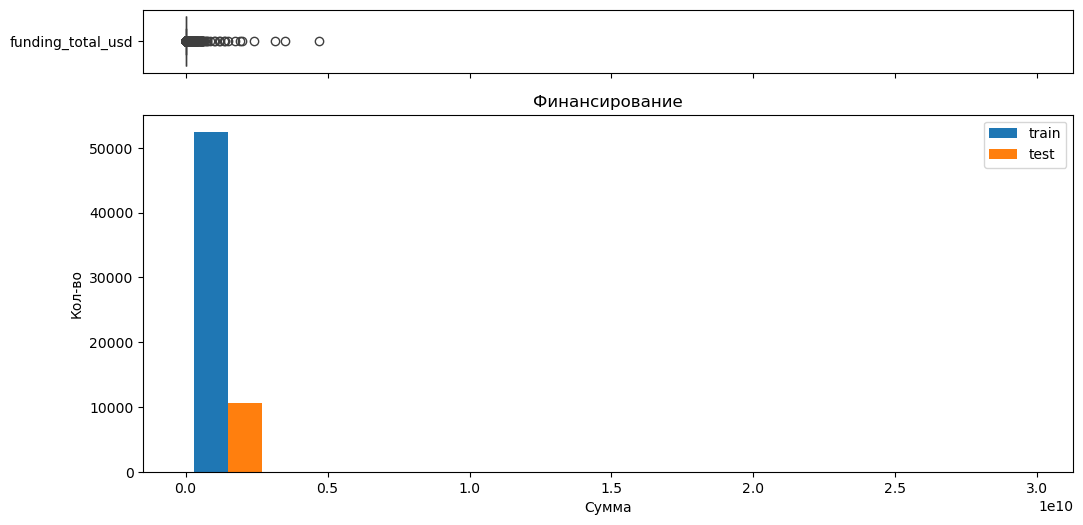

In [31]:
histogram_func(
    train=kaggle_startups_train['funding_total_usd'],
    test=kaggle_startups_test['funding_total_usd'],
    bins=10, 
    range=(kaggle_startups_train['funding_total_usd'].min(),kaggle_startups_train['funding_total_usd'].max()),
    title='Финансирование',
    xlabel='Сумма',
    ylabel='Кол-во'
)

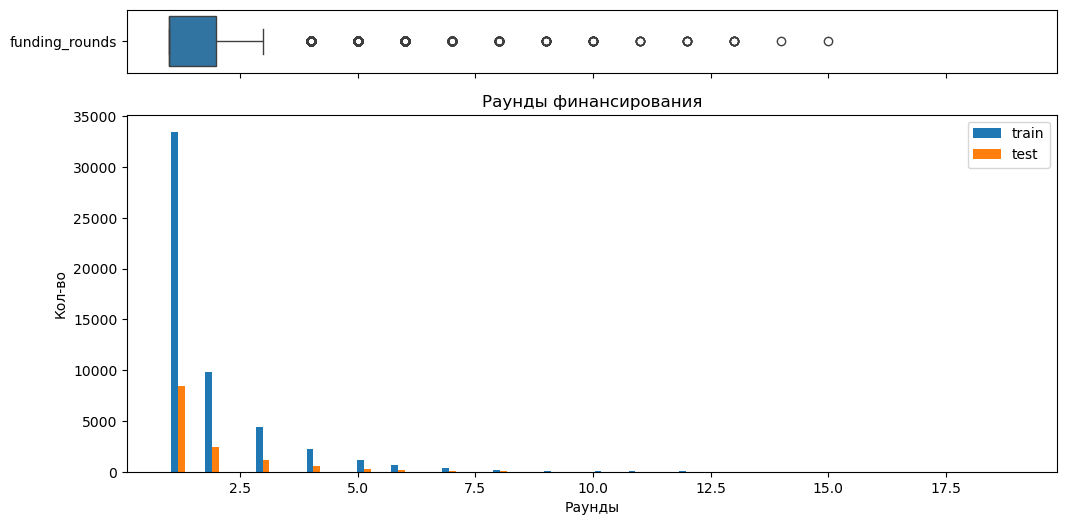

In [32]:
histogram_func(
    train=kaggle_startups_train['funding_rounds'],
    test=kaggle_startups_test['funding_rounds'],
    bins=50, 
    range=(kaggle_startups_train['funding_rounds'].min(),kaggle_startups_train['funding_rounds'].max()),
    title='Раунды финансирования',
    xlabel='Раунды',
    ylabel='Кол-во'
)

In [33]:
kaggle_startups_train['founded_at'].value_counts().head(15)

founded_at
2012-01-01    2171
2011-01-01    2004
2013-01-01    1949
2010-01-01    1673
2009-01-01    1457
2014-01-01    1263
2007-01-01    1198
2008-01-01    1136
2006-01-01     981
2005-01-01     883
2004-01-01     837
2000-01-01     732
2003-01-01     668
1999-01-01     645
2001-01-01     634
Name: count, dtype: int64

Создам столбец lifetime, как в тестовой выборке, у нас есть для этого данные в тренировочной, пустые значения в стобце closed_at заменяю на дату выгрузки. 

In [34]:
stop_date = pd.to_datetime('2018-01-01')

def company_lifetime(row):
    stop_date = pd.to_datetime('2018-01-01')
    
    if pd.isna(row['closed_at']):
        return (stop_date - row['founded_at']).days
    else:
        return (row['closed_at'] - row['founded_at']).days

In [35]:
kaggle_startups_train['lifetime'] = kaggle_startups_train.apply(company_lifetime, axis=1)

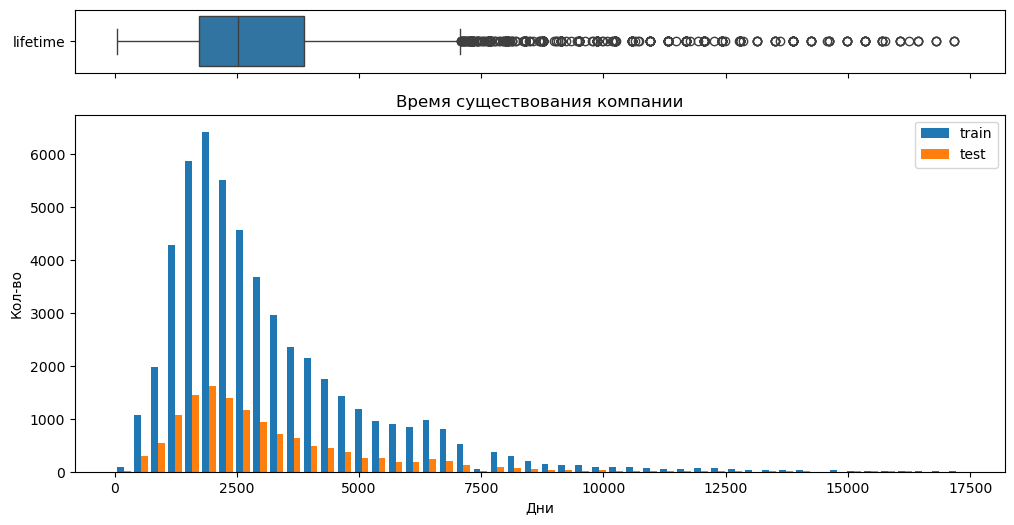

In [36]:
histogram_func(
    train=kaggle_startups_train['lifetime'],
    test=kaggle_startups_test['lifetime'],
    bins=50, 
    range=(kaggle_startups_train['lifetime'].min(),kaggle_startups_train['lifetime'].max()),
    title='Время существования компании',
    xlabel='Дни',
    ylabel='Кол-во'
)

In [37]:
kaggle_startups_train['lifetime'].describe()

count   52,516.00
mean     3,140.83
std      2,147.82
min         19.00
25%      1,739.00
50%      2,557.00
75%      4,018.00
max     17,378.00
Name: lifetime, dtype: float64

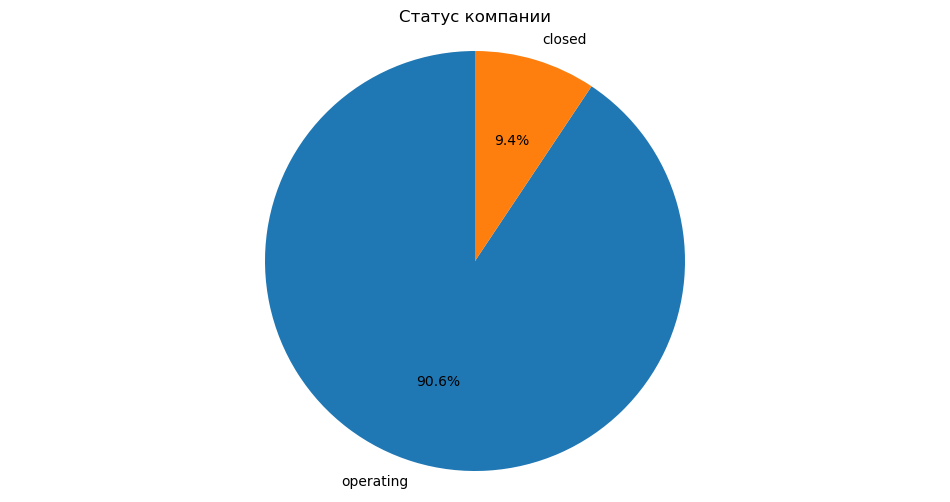

In [38]:
status_counts = kaggle_startups_train['status'].value_counts()

plt.figure(figsize=(12, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Статус компании')
plt.axis('equal')
plt.show()

C:\Users\kkoss\AppData\Local\Temp\ipykernel_4672\3637705555.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\kkoss\AppData\Local\Temp\ipykernel_4672\3637705555.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


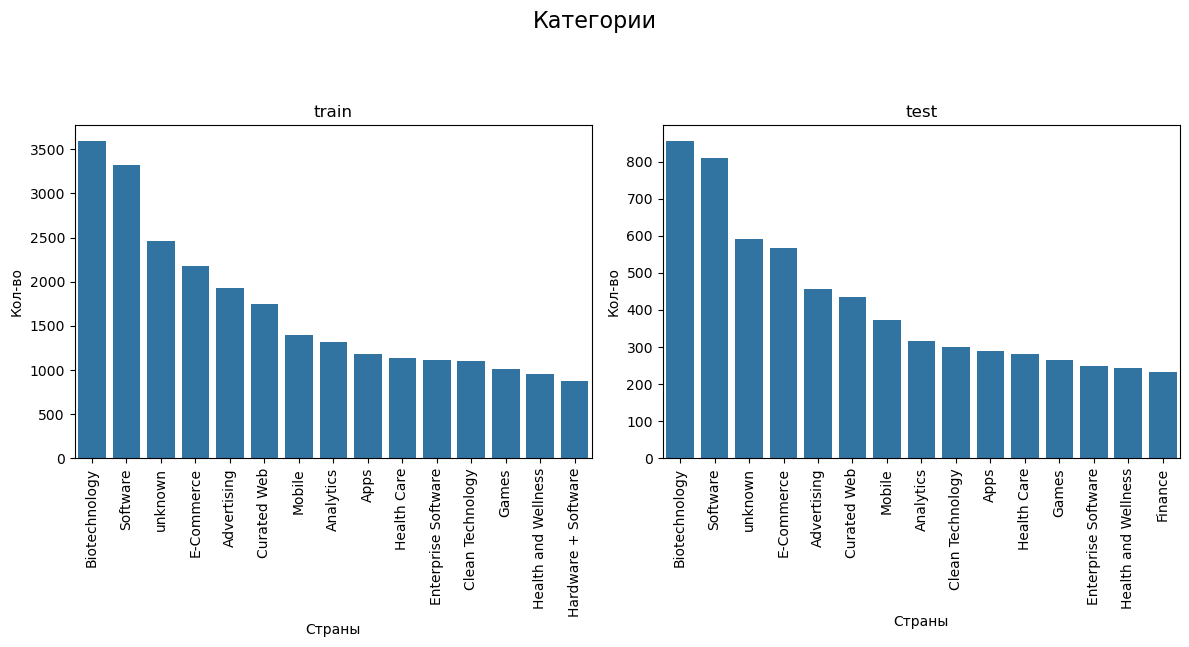

In [39]:
countplot_func(
    train=kaggle_startups_train,
    test=kaggle_startups_test,
    column_name = 'category_list',
    suptitle ='Категории',
    xlabel='Страны',
    ylabel='Кол-во'
)


C:\Users\kkoss\AppData\Local\Temp\ipykernel_4672\3637705555.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\kkoss\AppData\Local\Temp\ipykernel_4672\3637705555.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


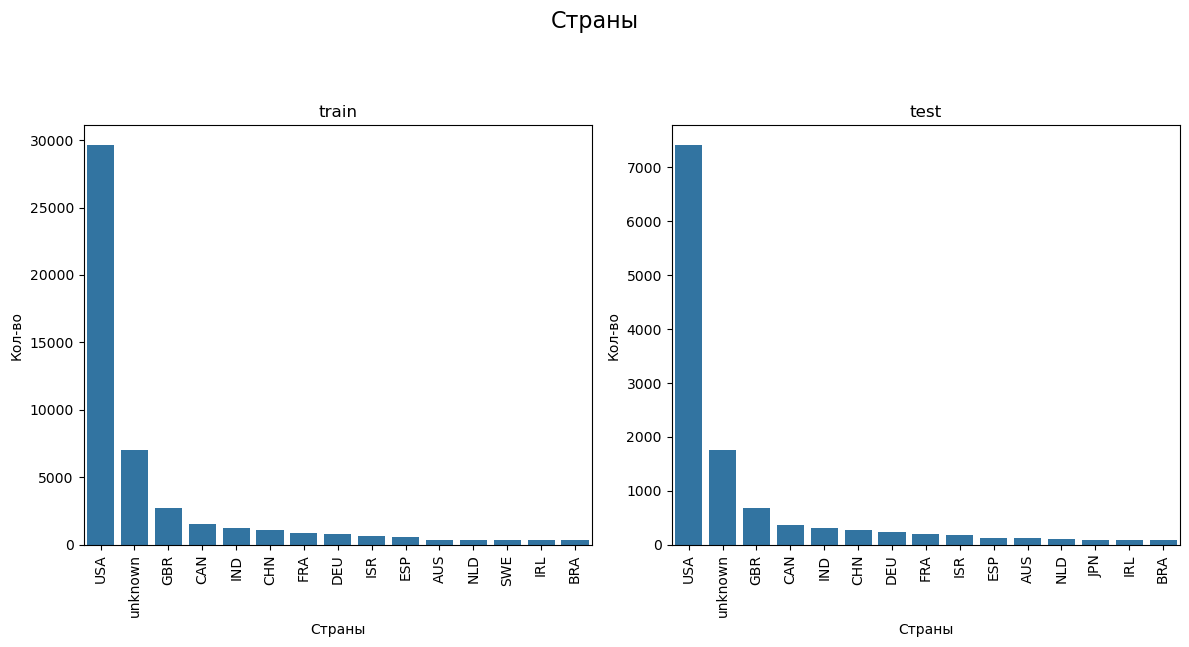

In [40]:
countplot_func(
    train=kaggle_startups_train,
    test=kaggle_startups_test,
    column_name = 'country_code',
    suptitle ='Страны',
    xlabel='Страны',
    ylabel='Кол-во'
)


In [41]:

operating_data = kaggle_startups_train[kaggle_startups_train['status'] == 'operating']
grouped_data = operating_data.groupby('country_code').size().reset_index(name='count')
sorted_data = grouped_data.sort_values(by='count', ascending=False)
sorted_data.head(15)

,country_code,count
110,USA,27336
111,unknown,5588
37,GBR,2538
17,CAN,1399
47,IND,1210
20,CHN,1071
36,FRA,807
27,DEU,763
51,ISR,628
33,ESP,557


In [42]:

data_closed = kaggle_startups_train[kaggle_startups_train['status'] == 'closed']
grouped_data_closed = data_closed.groupby('country_code').size().reset_index(name='count')
sorted_data_closed = grouped_data_closed.sort_values(by='count', ascending=False)
sorted_data_closed.head(15)

,country_code,count
67,USA,2277
68,unknown,1409
21,GBR,220
8,CAN,128
53,RUS,108
20,FRA,67
15,DEU,61
31,ISR,54
11,CHN,52
28,IND,51


#### Промежуточные выводы по исследованию количественных и качественных показателей

* в кол-венных показателях много выбросов, особенно касаемо столбца финансирования
* у большинства компаний был 1 раунд финансирования
* большинство компаний основано с 2008 по 2012 год
* 90% стартапов в обучающей выборке обозначены как открытые, столбец имеет дисбаланс данных, что нужно учитывать
* раундов финансирования было от 1 до 19
* Минимально стартапы просуществовали 19 дней, максимально по данным из выборки - 47 лет, медианное значение 8 лет
* По категориям стратапы в обеих выборках распределяются одинаково: больше всего их в сферах биотеха, ПО, на третьем месте неизвестная сфера, далее e-commerce и реклама.
* По странам также в обучающей и тестовой выборке совпадают лидеры:США, неопределенная страна, Великобритания, Канада, Индия
* среди них лидеры как по открытым, так и по закрывшимся стартапам - США, неопределенная страна, Великобритания, Канада, Индия



# Добавление столбцов


Возьмем уже созданный ранее столбец lifetime. Также вычислим количество дней, которое компания работает. Также мне кажется, нужно поэкспериментировать с несколькими другими прзнаками и посмотреть потом их корреляцию, например, сколько было раундов финансирования у компании за один год работы, когда в первый и последний раз компания была профинансирована

In [43]:
kaggle_startups_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime
0,Lunchgate,Online Reservations,"828,626.00",operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT,2998
1,EarLens,Manufacturing,"42,935,019.00",operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT,4748
2,Reviva Pharmaceuticals,Biotechnology,"35,456,381.00",operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT,4383
3,Sancilio and Company,Health Care,"22,250,000.00",operating,unknown,unknown,unknown,unknown,3,2004-01-01,2011-09-01,2014-07-18,NaT,5114
4,WireTough Cylinders,Manufacturing,"860,000.00",operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT,2791


In [44]:
kaggle_startups_train['first_funding'] = (stop_date - kaggle_startups_train['first_funding_at']).dt.days
kaggle_startups_train['first_funding'] = (stop_date - kaggle_startups_train['first_funding_at']).dt.days

Создали столбец с днями с первого финансирования до закрытия/выгрузки

In [45]:
kaggle_startups_train['last_funding'] = (stop_date - kaggle_startups_train['last_funding_at']).dt.days
kaggle_startups_train['last_funding'] = (stop_date - kaggle_startups_train['last_funding_at']).dt.days

Создали столбец с днями с последнего финансирования до закрытия/выгрузки

In [46]:
year=365
kaggle_startups_train['rounds_per_year'] = kaggle_startups_train['funding_rounds'] / (kaggle_startups_train['lifetime'] / year)
kaggle_startups_train['rounds_per_year'] = kaggle_startups_train['funding_rounds'] / (kaggle_startups_train['lifetime'] / year)

Подсчитали раунды финансирования

In [47]:
kaggle_startups_train['last_funding_lifetime'] = kaggle_startups_train['last_funding'] / kaggle_startups_train['lifetime']
kaggle_startups_train['last_funding_lifetime'] = kaggle_startups_train['last_funding'] / kaggle_startups_train['lifetime']

Подсчитали соотношение времени с последнего финансирования к времени существования компании 

In [48]:
kaggle_startups_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime,first_funding,last_funding,rounds_per_year,last_funding_lifetime
0,Lunchgate,Online Reservations,"828,626.00",operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaT,2998,2437,1127,0.24,0.38
1,EarLens,Manufacturing,"42,935,019.00",operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaT,4748,2799,1406,0.31,0.30
2,Reviva Pharmaceuticals,Biotechnology,"35,456,381.00",operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaT,4383,1960,1279,0.25,0.29
3,Sancilio and Company,Health Care,"22,250,000.00",operating,unknown,unknown,unknown,unknown,3,2004-01-01,2011-09-01,2014-07-18,NaT,5114,2314,1263,0.21,0.25
4,WireTough Cylinders,Manufacturing,"860,000.00",operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaT,2791,2161,2161,0.13,0.77


# Корреляционный анализ с помощью phik

У меня виснет комьютер при попытке построить корреляцию, поэтому пришлось взять 1000  значений)

In [49]:
corr_train = kaggle_startups_train.drop(['closed_at','founded_at', 'state_code', 'region', 'city', 'first_funding_at', 'last_funding_at'],axis=1).set_index('name')
corr_test = kaggle_startups_test.drop(['state_code', 'region', 'city', 'first_funding_at', 'last_funding_at'],axis=1).set_index('name')

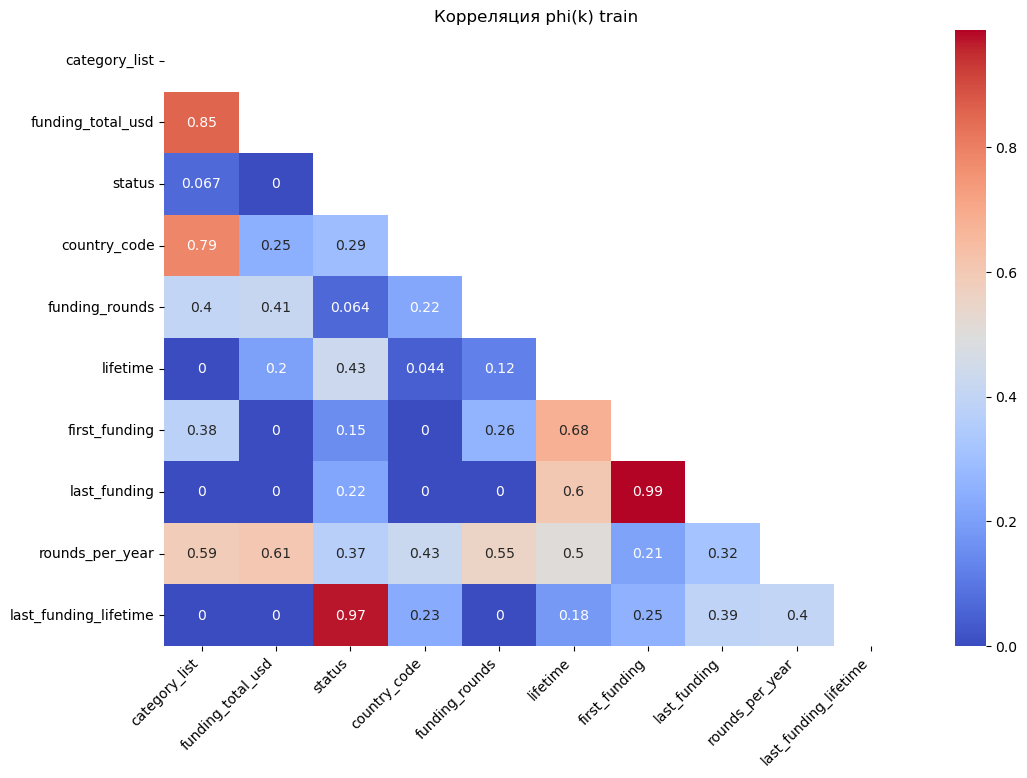

In [50]:
correlation, _ = train_test_split(
    corr_train,
    train_size=1000,
    random_state=RANDOM_STATE
)

correlation_data = correlation.phik_matrix(interval_cols=correlation.select_dtypes(include='number').columns.tolist())

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 8))

chart = sns.heatmap(correlation_data, annot=True, cmap='coolwarm', mask=mask)
plt.title(r'Корреляция phi(k) train')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show() 

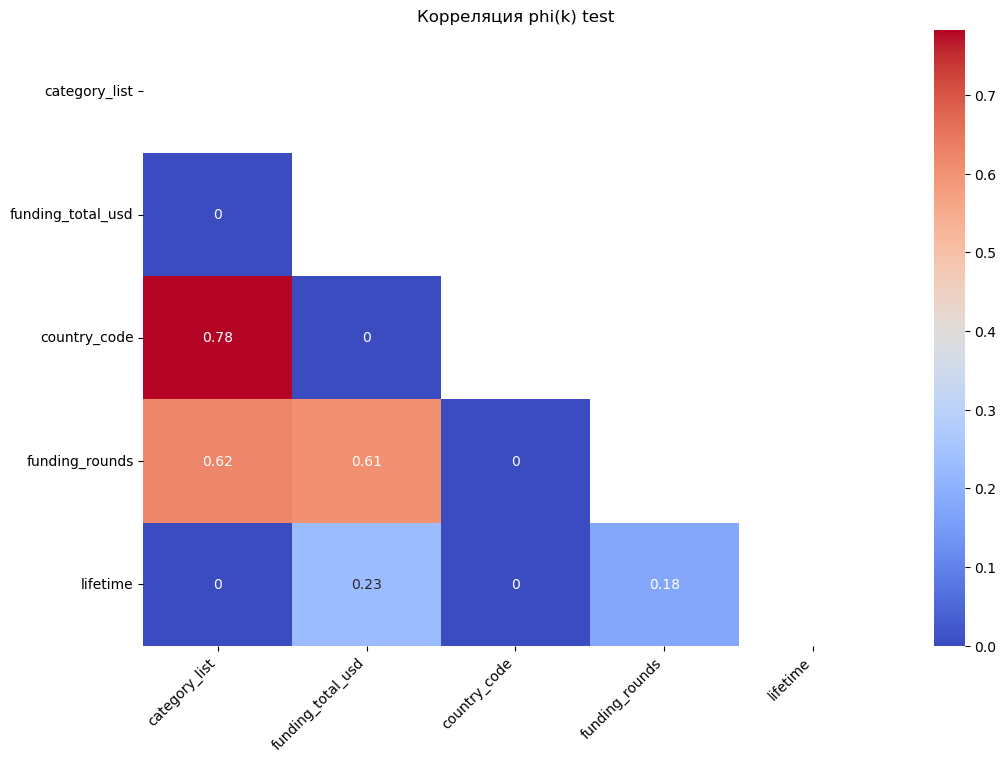

In [51]:
correlation, _ = train_test_split(
    corr_test,
    train_size=1000,
    random_state=RANDOM_STATE
)

correlation_data = correlation.phik_matrix(interval_cols=correlation.select_dtypes(include='number').columns.tolist())

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 8))

chart = sns.heatmap(correlation_data, annot=True, cmap='coolwarm', mask=mask)
plt.title(r'Корреляция phi(k) test')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show() 

#### Промежуточные выводы по корреляции
Сразу убрала столбцы, которые вызвали бы мультиколлинеарность.
* Мультиколлинеарность присутствует у статуса и соотношения времени с последнего финансирования к времени существования компании, что логично
* Также мультиколлинеарность есть у первого и последнего финансирования до закрытия/выгрузки, что тоже ожидаемо
* на целевой признак больше всего влияют параметры lifetime, country_code, last_funding, rounds_per_year, учитываем при построении модели


# Разрабатываем модель

In [52]:
df_final = kaggle_startups_train.drop(['closed_at','founded_at', 'state_code', 'region', 'city', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'name'], axis=1)

In [53]:
df_train_X = df_final.drop('status', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
    df_train_X, 
    df_final['status'], 
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_final['status'])

ord_columns = ['country_code']
ohe_columns = ['category_list']
num_columns = df_train_X.select_dtypes(include='number').columns.tolist()

In [54]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [55]:
display(pd.DataFrame(data=label_encoder.classes_, columns=['status']))

,status
0,closed
1,operating


In [56]:
df_train_X.select_dtypes(include='number').columns.tolist()

['funding_total_usd',
 'lifetime',
 'first_funding',
 'last_funding',
 'rounds_per_year',
 'last_funding_lifetime']

In [57]:
cat_columns = df_train_X.select_dtypes(exclude='number').columns.tolist()
cat_columns

['category_list', 'country_code']

In [58]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

In [59]:
col_transformer = make_column_transformer(
    ((ohe_pipe), ['country_code', 'category_list']),
    (MinMaxScaler(), num_columns),
    remainder='passthrough')

Из-за дисбаланса в status попробуем использовать SMOTETomek

In [60]:
sampler = SMOTETomek(random_state=RANDOM_STATE)
model = SVC(random_state=RANDOM_STATE,probability=True,class_weight='balanced')
pipeline = make_imblearn_pipeline(col_transformer, sampler, model)

pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['country_code',
                                                   'category_list']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['funding_total_usd',
                                                   'lifetime', 'first_funding',
                                                   'last_funding',
                                                   'rounds_per_year',
                                                   'last_funding_lifetime'])])),
                ('smotetomek', SMOTETomek(random_state=42)),
                ('svc',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

In [61]:
params_distr = [
    
    {
        'svc' : [DecisionTreeClassifier(random_state=RANDOM_STATE,class_weight='balanced')],
        'svc__max_depth' : range(5,20),
        'columntransformer__minmaxscaler' : [RobustScaler(),StandardScaler(),'passthrough'],
        'smotetomek' : [SMOTETomek(random_state=RANDOM_STATE), SMOTEENN(random_state=RANDOM_STATE)] 
    },
    

    {
        'svc' : [KNeighborsClassifier()],
        'svc__n_neighbors' : range(3,20),
        'columntransformer__minmaxscaler' :  [RobustScaler(),StandardScaler(),'passthrough'],
        'smotetomek' : [SMOTETomek(random_state=RANDOM_STATE), SMOTEENN(random_state=RANDOM_STATE)]   
    },
    

    {
        'svc' : [SVC(random_state=RANDOM_STATE,probability=True,class_weight='balanced')],
        'svc__C' : range(1, 3),
        'columntransformer__minmaxscaler' : [RobustScaler(),StandardScaler()],
        'smotetomek' : [SMOTETomek(random_state=RANDOM_STATE), SMOTEENN(random_state=RANDOM_STATE)]  
    },

    
    {
        'svc' : [RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')],
        'columntransformer__minmaxscaler' : [StandardScaler(),RobustScaler(),'passthrough'],
        'smotetomek' : [SMOTETomek(random_state=RANDOM_STATE), SMOTEENN(random_state=RANDOM_STATE)]
    }
    
]

In [62]:
randomized = RandomizedSearchCV(
    pipeline, 
    param_distributions = params_distr,
    cv = 5,
    scoring = 'f1',
    n_jobs = -1,
    random_state=RANDOM_STATE
)


randomized

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(fill_value='Unknown',
                                                                                                              strategy='constant')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['country_code',
                                                                                'category_list']),
                                                                              (...
                                                        SMOTEENN(random_state=42)],
                                         'svc': [SVC(class_weight='balanced',
                                                     probability=True,
                                                     random_state=42)],
                                         'svc__C': range(1, 3)},
                                        {'columntransformer__minmaxscaler': [StandardScaler(),
                                                                             RobustScaler(),
                                                                             'passthrough'],
                                         'smotetomek': [SMOTETomek(random_state=42),
                                                        SMOTEENN(random_state=42)],
                                         'svc': [RandomForestClassifier(class_weight='balanced',
                                                                        random_state=42)]}],
                   random_state=42, scoring='f1')

In [63]:
randomized.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', randomized.best_estimator_)
print('Метрика f1 для лучшей модели:\n', round(randomized.best_score_, 5))

Лучшая модель и её параметры:

 Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['country_code',
                                                   'category_list

In [67]:
y_pred = randomized.predict(X_test)
y_pred_proba = randomized.predict(X_test)
print(f'Метрика f1 для лучшей модели RandomizedSearch на валидационной выборке: {round(f1_score(y_test, y_pred), 5)}')
print(f'Метрика ROC_AUC для лучшей модели RandomizedSearch на валидационной выборке: {round(roc_auc_score(y_test, y_pred_proba), 5)}')

C:\Users\kkoss\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\kkoss\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Метрика f1 для лучшей модели RandomizedSearch на валидационной выборке: 0.98458
Метрика ROC_AUC для лучшей модели RandomizedSearch на валидационной выборке: 0.91672


#### Промежуточные выводы

* Мы подготовили выборку, разделив её на тренировочную и валидационную части, использовали LabelEncoder для кодирования целевой переменной.

* мы создали пайплайн, провели кодирование и масштабирование входных признаков. Использовали метод комбинированного сэмплирования SMOTETomek, чтобы справиться с дисбалансом классов и повысить эффективность обученной модели. 
* Обучение моделей и настройка гиперпараметров проводились с использованием методаRandomizedSearch
* мы получили предсказания с использованием лучших моделей на тестовой выборке


По итогам всех испытаний, лучшие результаты выглядят следующим образом:

Лучше всех себя показала модель RandomForestClassifier, оценки на валидационной выборке: 
- f1_score = 0.98414
- roc_auc = 0.91959

# Выводы

В проекте мы работали с данными о стартапах, функционировавших в период с 1970 по 2018 годы.

Цель: предсказать, какие из стартапов закроются, а какие продолжат функционировать.

Проведенная работа:

Загрузили и первично осмотрели датасеты.

* kaggle_startups_sample: Количество строк: 13125, Количество столбцов: 2, нет пропусков, нет явных дубликатов, названия корректны - датасет нужен был для соревнования 
* kaggle_startups_train: Количество строк: 52516, Количество столбцов: 13, есть пропуски, явных дубликатов нет, названия корректны
* kaggle_startups_test:Количество строк: 13125, Количество столбцов: 11, есть пропуски, явных дубликатов нет, названия корректны

Предобработка:

* В нескольких столбцах тренировочной и тестовой выборки поменяли формат данных на дату
* В тренировочной и тестовой выборках обнаружены пропуски в столбцах с географическими данными и с категорией стартапа. Эти данные восстановить как-либо не получится, поэтому я поменяла их на unknown, чтобы не было пропусков.
* Также нужно обработать пропуски в столбце funding_total_usd, я запонила в тренировочной выборке данные медианой, предварительно сгруппированной по раундам финансирования. Что касается тестовой выборки, в ней подобные изменения я бы делать не стала, исходя из предыдщуих ревью я поняла, что ее нужно оставлять максимально необработанной, так как эта выборка имитирует реальный поток, в котором модели нужно будет работать со всеми наблюдениями.
* Столбцы с категориями стартапа сами по себе очень проблемны из-за нескольких категорий, указанных через слэш. По возможно вообще эти категории нужно укрупнять и разделять на несолько больших групп, подключив дополнительные инструменты (нейросеть, например). Если я сейчас буду делать это вручную, боюсь только испорчу данные, так как значений и вариантов очень много. Поэтому здесь я решила просто разделить категории и принять первую из них за основную.

Исследование: 

* в кол-венных показателях много выбросов, особенно касаемо столбца финансирования
* у большинства компаний был 1 раунд финансирования
* большинство компаний основано с 2008 по 2012 год
* 90% стартапов в обучающей выборке обозначены как открытые, столбец имеет дисбаланс данных, что нужно учитывать
* раундов финансирования было от 1 до 19
* Минимально стартапы просуществовали 19 дней, максимально по данным из выборки - 47 лет, медианное значение 8 лет
* По категориям стратапы в обеих выборках распределяются одинаково: больше всего их в сферах биотеха, ПО, на третьем месте неизвестная сфера, далее e-commerce и реклама.
* По странам также в обучающей и тестовой выборке совпадают лидеры:США, неопределенная страна, Великобритания, Канада, Индия
* среди них лидеры как по открытым, так и по закрывшимся стартапам - США, неопределенная страна, Великобритания, Канада, Индия


Корреляция
* убрала столбцы, которые вызвали бы мультиколлинеарность.
* Мультиколлинеарность присутствует у статуса и соотношения времени с последнего финансирования к времени существования компании, что логично
* Также мультиколлинеарность есть у первого и последнего финансирования до закрытия/выгрузки, что тоже ожидаемо
* на целевой признак больше всего влияют параметры lifetime, country_code, last_funding, rounds_per_year, учитываем при построении модели

Модель:

* Мы подготовили выборку, разделив её на тренировочную и валидационную части, использовали LabelEncoder для кодирования целевой переменной.
* мы создали пайплайн, провели кодирование и масштабирование входных признаков. Использовали метод комбинированного сэмплирования SMOTETomek, чтобы справиться с дисбалансом классов и повысить эффективность обученной модели. 
* Обучение моделей и настройка гиперпараметров проводились с использованием методаRandomizedSearch
* мы получили предсказания с использованием лучших моделей на тестовой выборке


По итогам всех испытаний, лучшие результаты выглядят следующим образом:

Лучше всех себя показала модель RandomForestClassifier, оценки на валидационной выборке: 
- f1_score = 0.98414
- roc_auc = 0.91959 